In [1]:
# Week14 exercise

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# one dimensional advection-diffusion equation

In [4]:
# setting up model parameters
dt=0.1
L=10
Nt=300
Nx=100
U=0.3
D=0.06
x=np.linspace(-L,L,Nx)
dx=2*L/Nx
C=U*dt/dx+D*dt/dx/dx
print('Courant number is '+str(C))

Courant number is 0.3


/Users/takamitsu3/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


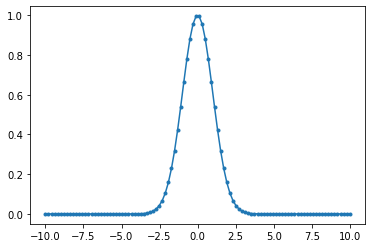

In [7]:
# setting up grid and initial condition
C=np.zeros((Nx,Nt),dtype="complex_")
C[:,0]=np.exp(-0.5*(x)**2)
plt.plot(x,C[:,0],'.-')
Ct=np.fft.fft(C[:,0])

In [8]:
# time stepping loop
for n in range(0,Nt-1):
    C[:,n]=np.fft.ifft(Ct)
    # spectral method
    for l in range(0,Nx-1):
        G=1j*U*(np.pi*l/L)+D*(np.pi*l/L)**2
        Ct[l]=Ct[l]/(1+dt*G) # Euler backward

    #C[:,n+1]=np.fft.ifft(Ct)
    # take care of the boundary points: (Periodic)
    #C[0,n+1]=C[0,n]-U*dt/(2*dx)*(C[1,n]-C[Nx-1,n])
    #C[Nx-1,n+1]=C[Nx-1,n]-U*dt/(2*dx)*(C[0,n]-C[Nx-2,n])
    
    #for m in range(1,Nx-1): 
        # FTCS (Euler Forward) advection equation
        #C[m,n+1]=C[m,n]-U*dt/(2*dx)*(C[m+1,n]-C[m-1,n])
        # FTCS (Euler forward) advection diffusion equation
        #C[m,n+1]=C[m,n]+D*dt/(dx**2)*(C[m+1,n]-2*C[m,n]+C[m-1,n])-U*dt/(2*dx)*(C[m+1,n]-C[m-1,n])
        # Lax scheme
        #C[m,n+1]=.5*(C[m+1,n]+C[m-1,n])-U*dt/(2*dx)*(C[m+1,n]-C[m-1,n])

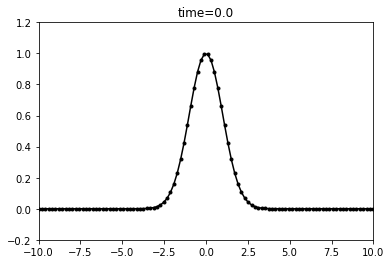

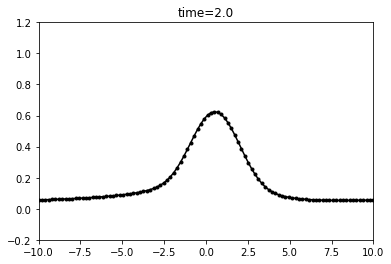

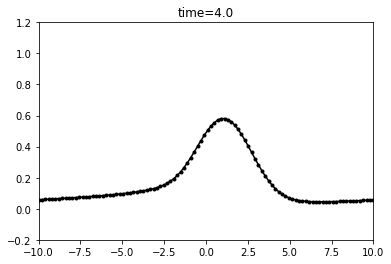

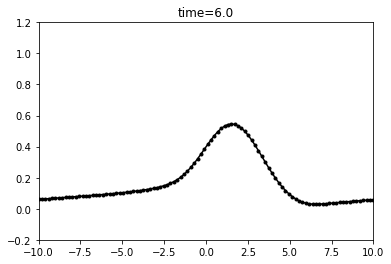

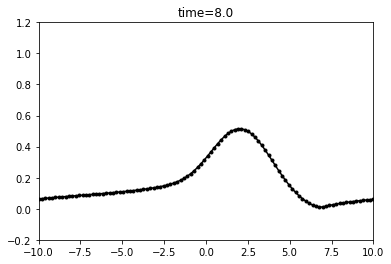

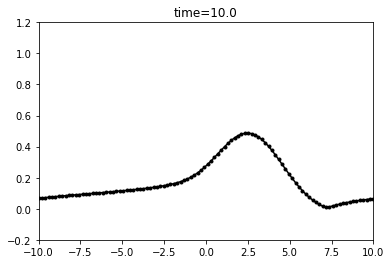

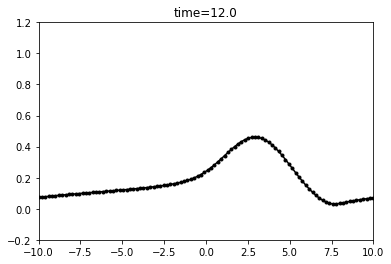

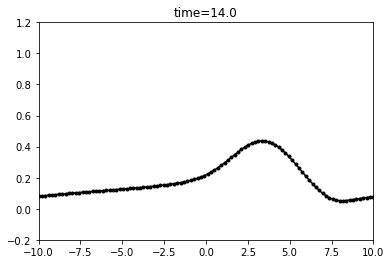

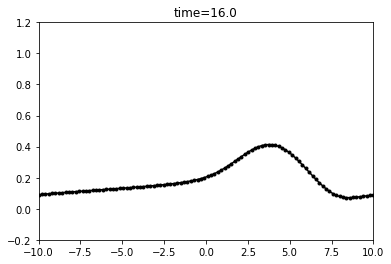

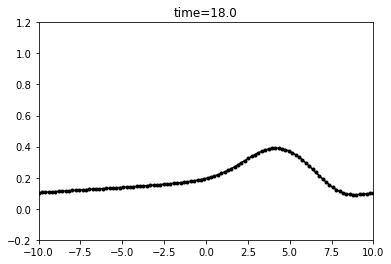

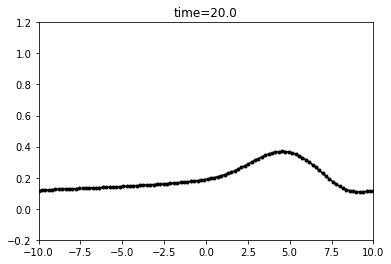

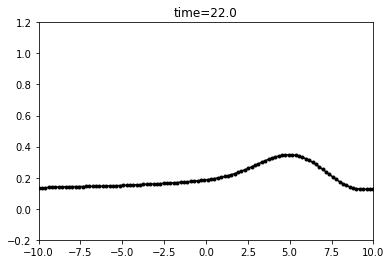

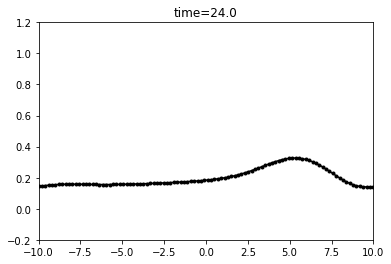

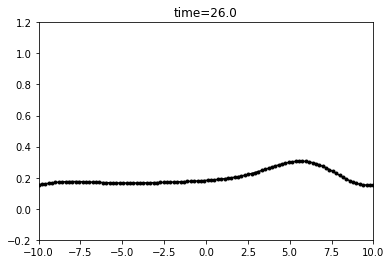

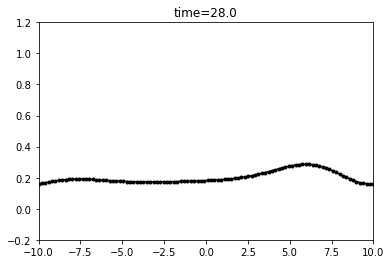

In [9]:
# plot the result, one plot for every 20 timesteps
for n in range(0,round(Nt/20)):
    plt.plot(x,abs(C[:,n*20]),'.k-')
    plt.title('time='+str(round(n*dt*20,3)))
    plt.axis((-L,L,-.2,1.2))
    plt.show()